In [4]:
import kagglehub
path = kagglehub.dataset_download("imdevskp/corona-virus-report")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Swarali Limaye\.cache\kagglehub\datasets\imdevskp\corona-virus-report\versions\166


In [5]:
import pandas as pd
import os
files_in_path = os.listdir(path)
print("Files in the dataset directory:", files_in_path)
csv_file = None
for f in files_in_path:
    if f.endswith('.csv'):
        csv_file = f
        break

if csv_file:
    full_file_path = os.path.join(path, csv_file)
    print(f"Identified data file: {full_file_path}")
    df = pd.read_csv(full_file_path)
    print("Dataset loaded successfully. Displaying the first 5 rows:")
    print(df.head())
else:
    print("No CSV file found in the directory. Please check the dataset contents.")

Files in the dataset directory: ['country_wise_latest.csv', 'covid_19_clean_complete.csv', 'day_wise.csv', 'full_grouped.csv', 'usa_county_wise.csv', 'worldometer_data.csv']
Identified data file: C:\Users\Swarali Limaye\.cache\kagglehub\datasets\imdevskp\corona-virus-report\versions\166\country_wise_latest.csv
Dataset loaded successfully. Displaying the first 5 rows:
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63 

In [6]:
print("DataFrame Info:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

# Convert 'Date' column to datetime (only if it exists)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    print("\n'Date' column converted to datetime.")
else:
    print("\nNo 'Date' column found — skipping datetime conversion.")

# Clean column names
df.columns = df.columns.str.replace(' ', '_').str.lower()
print("\nColumn names cleaned. New column names:")
print(df.columns)

print("\nFirst 5 rows of the preprocessed DataFrame:")
print(df.head())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              18

ValueError: Could not interpret value `date` for `x`. An entry with this name does not appear in `data`.

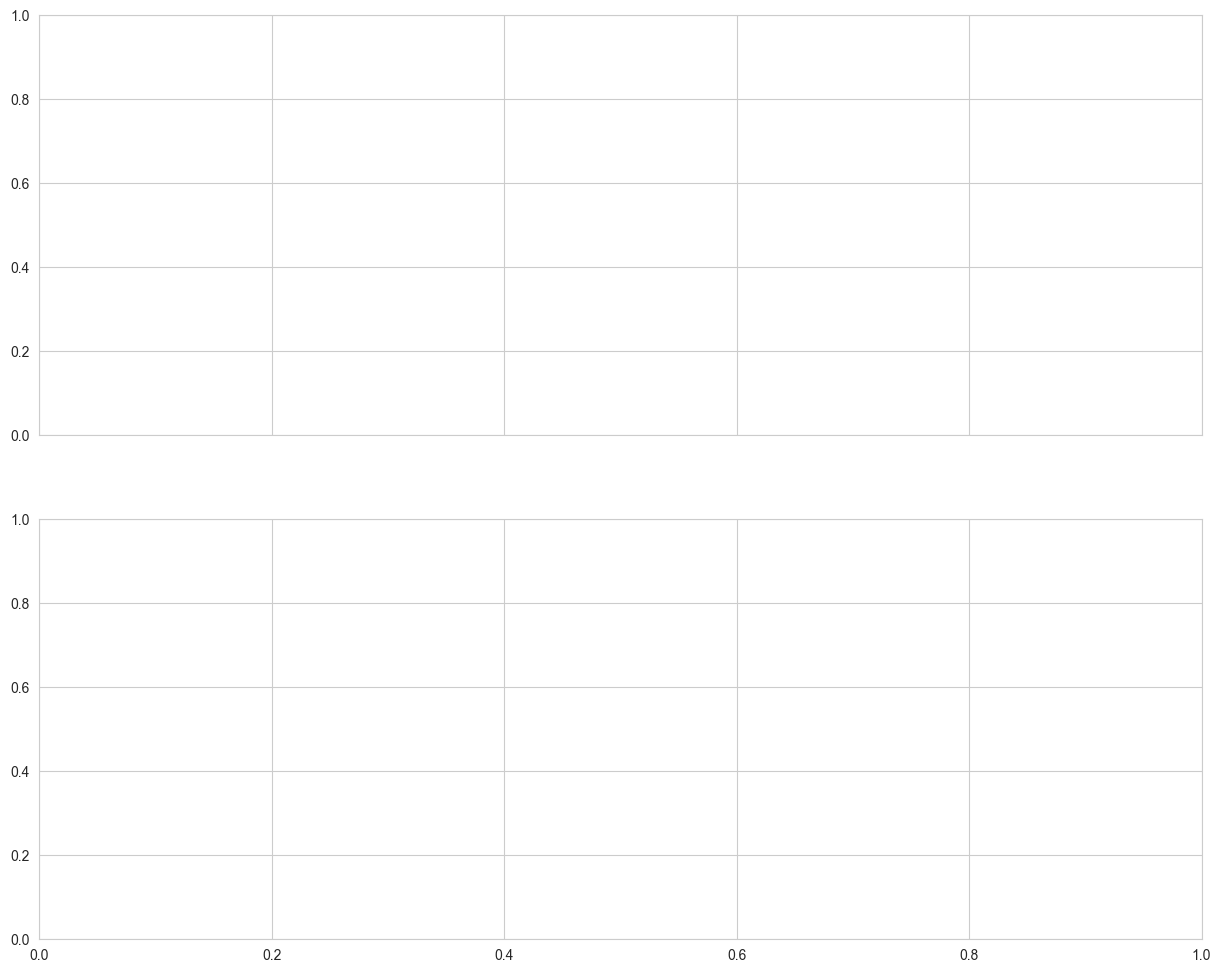

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Check available columns
print("Available columns:", df.columns.tolist())

# Detect possible date column
possible_date_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
if possible_date_cols:
    date_col = possible_date_cols[0]   # pick the first matching one
    print(f"Using '{date_col}' as the date column.")
else:
    raise ValueError("No column found that looks like a date. Please rename your date column to 'date'.")

# Rename the date column to 'date' for consistency
df = df.rename(columns={date_col: 'date'})

# Create the plots safely — check if columns exist before plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12), sharex=True)

# Plot 1: Cumulative data
for col, color in zip(['confirmed', 'deaths', 'recovered'], ['blue', 'red', 'green']):
    if col in df.columns:
        sns.lineplot(ax=axes[0], x='date', y=col, data=df, label=col.capitalize(), color=color)

axes[0].set_title('Cumulative COVID-19 Cases Over Time', fontsize=16)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Number of Cases', fontsize=12)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Plot 2: Daily new data
for col, color in zip(['new_cases', 'new_deaths', 'new_recovered'], ['orange', 'purple', 'teal']):
    if col in df.columns:
        sns.lineplot(ax=axes[1], x='date', y=col, data=df, label=col.replace('_', ' ').title(), color=color)

axes[1].set_title('Daily New COVID-19 Cases, Deaths, and Recovered Over Time', fontsize=16)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Number of New Cases', fontsize=12)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("✅ Generated time-series plots for cumulative and new COVID-19 cases, deaths, and recoveries.")


Summary: Data Analysis Key Findings Dataset Loading and Initial Inspection: The day_wise.csv file, containing 188 entries and 12 columns, was successfully loaded. It included daily data on 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', and various rates per 100 cases/recovered. Data Quality and Preprocessing: The dataset was found to have no missing values across all columns. The 'Date' column was correctly converted to datetime format, and all column names were cleaned by replacing spaces with underscores and converting them to lowercase (e.g., 'New cases' became 'new_cases'). Cumulative Trends: Confirmed Cases showed a clear exponential growth, with the curve continuously steepening throughout the observed period. Deaths increased at a significantly slower rate compared to confirmed and recovered cases, appearing much flatter. Recovered Cases also exhibited a strong upward, exponential trend, closely mirroring confirmed cases but with a noticeable lag. The gap between cumulative confirmed and recovered cases widened over time, while the gap between confirmed cases and deaths remained relatively small. Daily Trends: Daily New Cases displayed a fluctuating but generally increasing trend, with significant surges observed, particularly a peak exceeding 250,000 new cases per day around late July/early August, indicating waves of accelerated spread. Daily New Deaths remained relatively low compared to new cases and new recoveries, showing a slight increase over time but lacking the sharp peaks seen in new cases. Daily New Recoveries showed a highly variable pattern, with spikes and dips, generally following the pattern of new cases with a delay. Overall Pandemic Pattern: The pandemic exhibited rapid growth, characterized by steepening cumulative curves. Daily trends indicated that this growth occurred in surges or waves, without a clear sign of significant deceleration or control within the observed timeframe. Insights or Next Steps The contrasting trends between rapidly increasing cumulative confirmed/recovered cases and the relatively flat cumulative death curve, along with the less sharp peaks in daily new deaths, suggest potential improvements in patient care or a shift in the demographic of affected populations, leading to lower mortality rates despite widespread infection. Further analysis could involve investigating the specific events or policy changes that might have contributed to the significant surges in daily new cases and recoveries observed around late July/early August, and correlating these with the corresponding lag in new deaths or recoveries.